<a href="https://colab.research.google.com/github/PeaceUdoka/firstTrial/blob/main/Customer_Data_Analysis_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Data Analysis Using Python
The dataset contains the data of customers in five different cities in India - Bengaluru, Chennai, Delhi, Kolkata and Mumbai.
The data includes the following columns:
1. CustomerID - a unique identification of each customer.
2. CustomerGender 
3. CustomerAge
4. CustomerCity
5. AnnualIncome
6. CreditScore - the higher the score, the higher the chances of the customer paying his bills/debts on time.
7. SpendingScore - this is a measure(out of 100) of a customer's spending habits.
8. CustomerCityID - this column wasn't relevant as it showed the same informmation as the CustomerCity.

### Step 1 - Asking Questions
The following questions were put forth to be answered based on the dataset.
1. How does a customer's spending habit vary by age, gender, and annual income?
2. How does a customer's credit score vary by age, gender, and annual income?
3. What kind of customers should be targeted through marketing strategies to improve sales?



**Let's see what the data looks like:**

In [ ]:
#importing pandas libraries for data analysis and loading dataset
import pandas as pd 
% matplotlib inline

data = pd.read_csv(r"Shopping_CustomerData.csv")

In [ ]:
#showing first few rows of dataset
data.head()



,CustomerID,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore,CustomerCityID
0,1001,Male,49,Bengaluru,527547.58850,653,78,1
1,1002,Male,59,Bengaluru,207143.19760,630,63,1
2,1003,Female,54,Delhi,164423.84570,555,69,4
3,1004,Female,42,Bengaluru,56220.36443,699,30,1
4,1005,Female,30,Bengaluru,256194.36190,793,6,1


**Let's check the shape of the data**

In [ ]:
data.shape

(200, 8)

This shows that the dataset contains records of 200 customers with 8 features.

### Step 2 - Wrangle data
Having seen what the data looks like, it needs to be assessed to identify any problems in its quality and cleaned approppriately.

**Let's look at the summary statistics of the data to understand it better.**

In [ ]:
data.describe()

,CustomerID,CustomerAge,AnnualIncome,CreditScore,SpendingScore,CustomerCityID
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000
mean,1100.500000,45.520000,285143.931646,719.975000,50.70500,2.850000
std,57.879185,16.113592,169229.187619,104.578236,28.72269,1.475938
min,1001.000000,18.000000,2577.057456,551.000000,2.00000,1.000000
25%,1050.750000,31.750000,153227.340950,628.250000,27.75000,1.750000
50%,1100.500000,46.500000,263418.505550,715.000000,48.00000,3.000000
75%,1150.250000,59.000000,384857.116200,806.250000,77.00000,4.000000
max,1200.000000,75.000000,695407.091700,897.000000,100.00000,5.000000


The following inferences can be derived from the summary statistics:
1. The count is 200 means the record is for 200 customers.
2. The minimum age of customers is 18 and the maximum age is 75. The mean age is 45 and the median is 46. Mean < Median. This means that more of the elderly ones prefer to go shopping in these cities.
3. The minimum annual income of customers is \\$2k. Maximum is \\$695k, mean is \\$285k and median is \\$263k. 
4. The minimum credit score is 551 and the maximum is 897. This shows that customers in this region are credit-worthy.
5. The minimum spending score is 2 and the maximum is 100. This shows how inclusive the data is. 

The following problems can be pointed out:
1. The CustomerCityID column isnt necessary and hence should be removed.
3. The CustomerID column is not in the right format.

**Let's resolve these problems**

In [ ]:
del data["CustomerCityID"] #deletes customercityID column


In [ ]:
data.head()


,CustomerID,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore
0,1001,Male,49,Bengaluru,527547.58850,653,78
1,1002,Male,59,Bengaluru,207143.19760,630,63
2,1003,Female,54,Delhi,164423.84570,555,69
3,1004,Female,42,Bengaluru,56220.36443,699,30
4,1005,Female,30,Bengaluru,256194.36190,793,6


In [ ]:
data["CustomerID"].astype(str) #converts to string


Next, let's make CustomerID column the index

In [ ]:
data.set_index("CustomerID").head()

,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore
CustomerID,,,,,,
1001,Male,49,Bengaluru,527547.58850,653,78
1002,Male,59,Bengaluru,207143.19760,630,63
1003,Female,54,Delhi,164423.84570,555,69
1004,Female,42,Bengaluru,56220.36443,699,30
1005,Female,30,Bengaluru,256194.36190,793,6


### Step 3 - Explore Data Through Visualizations
Now that all problems in the data have been fixed, let's go ahead to explore and find patterns through visualisations.

**Distribution of Gender Using a Pie Chart**

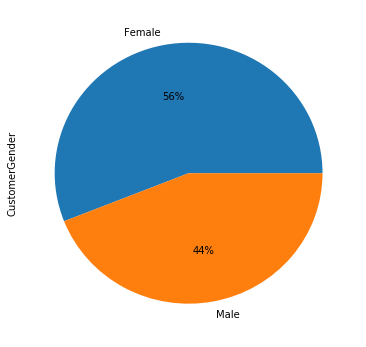

In [ ]:
data["CustomerGender"].value_counts().plot(kind = "pie", figsize = (6,6), autopct = "%1.0f%%")

#### The pie chart shows that there is a greater percentage of females(56%) that are customers than males(44%). This is important considering the fact that males have a higher population than females.

### Distribution of Customers by City

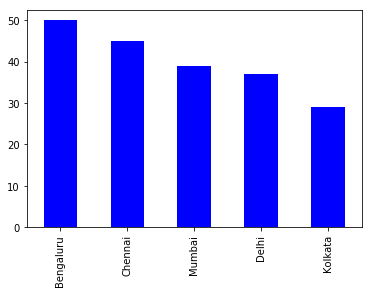

In [ ]:
data["CustomerCity"].value_counts().plot(kind="bar", color = "blue")
#plt.bar(data["CustomerCity"], data["CustomerID"])

The bar chart above shows that **Bengaluru has the highest number of recorded customers.**

### Distribution of Age

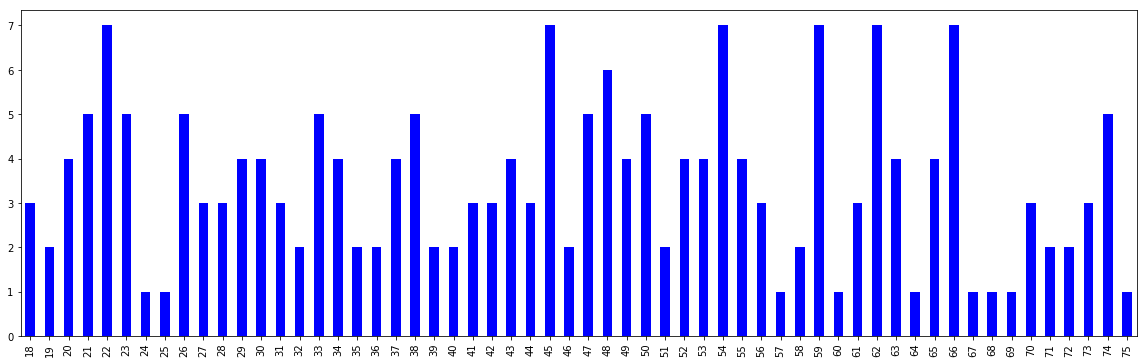

In [ ]:
data["CustomerAge"].value_counts().sort_index().plot(kind="bar", color = "blue", figsize=(20,6))

From the plot, it can be seen that majority of the customers are are in the age range 45 to 66. Customers in their 20s to 40s go shopping almost but not as much as the former category. Fewer customers in the age range of 67 to 75 go shopping. 



### Average SpendingScores by City



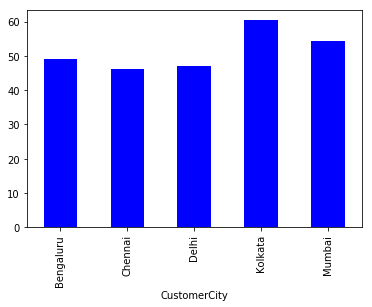

In [ ]:
data.groupby("CustomerCity")["SpendingScore"].mean().plot(kind="bar", color="blue")


The chart above shows that an average Koikata customer has highest spending score of all cities.

### Average Spendingscore by Gender

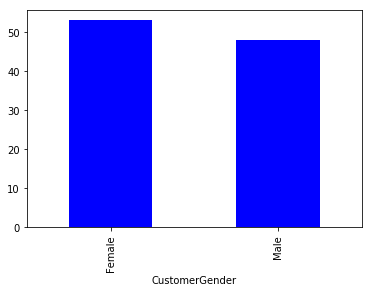

In [ ]:
data.groupby("CustomerGender")["SpendingScore"].mean().plot(kind="bar", color="blue")

This shows that that Females spend more than males as they tend to go shopping more than males.

### Relationship Between Age and SpendingScore

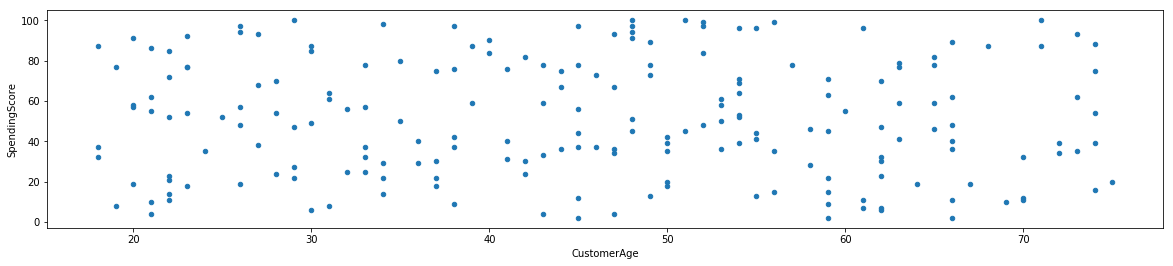

In [ ]:
data.plot(x="CustomerAge",  y="SpendingScore", kind="scatter", figsize=(20,4))

From the scatter plot above, there is no clear distinction in the effect of Age on Spending Score.

### Relationship Between AnnualIncome and SpendingScore

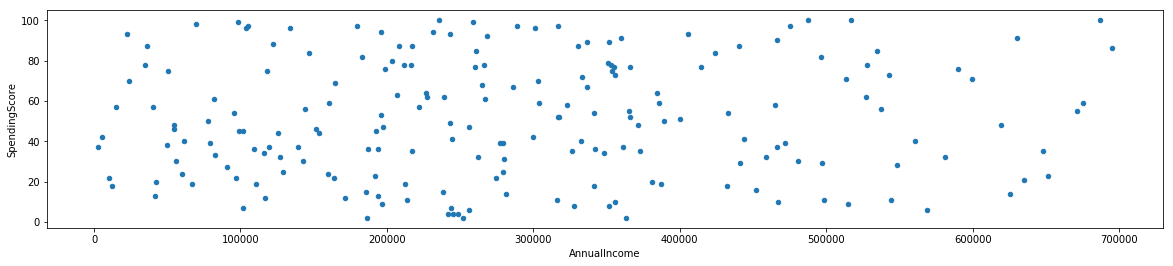

In [ ]:
data.plot(x="AnnualIncome",  y="SpendingScore", kind="scatter", figsize=(20,4))

The scatter plot shows that SpendingScore is more when AnnualIncome is between \\$200000 and \\$400000.
However, as AnnualIncome fell below \\$100000, the SpendingScore also reduced.

### Average AnnualIncome by Gender

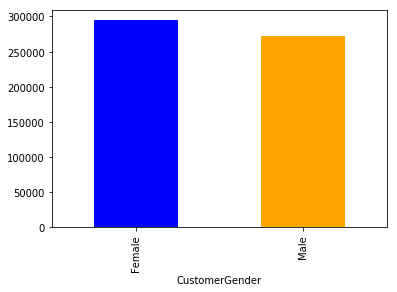

In [ ]:
data.groupby("CustomerGender")["AnnualIncome"].mean().plot(kind = "bar", color=("blue", "orange"))


This goes to prove why the average females shop more than males in these cities because they have a higher annual income.
Even the total average income of the female customers is higher than that of males as shown below.

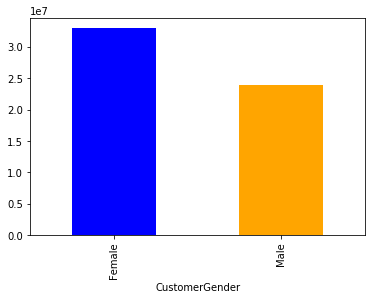

In [ ]:
data.groupby("CustomerGender")["AnnualIncome"].sum().plot(kind = "bar", color=("blue", "orange"))

### Average AnnuualIncome by City

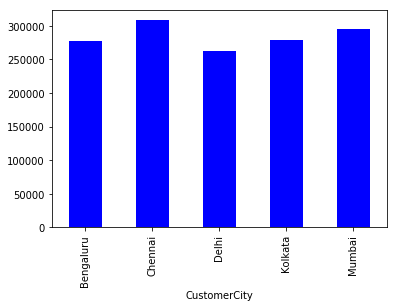

In [ ]:
data.groupby("CustomerCity")["AnnualIncome"].mean().plot(kind="bar", color="blue")

An average Chennai customer has the highest Annual Income in all five cities with Mumbai being a close second.

### Average CreditScore by Gender

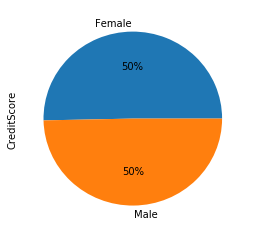

In [ ]:
data.groupby("CustomerGender")["CreditScore"].mean().plot(kind="pie", figsize = (4,4), autopct="%1.0f%%")

Despite the difference in their AnnualIncomes and SpendingScores,both male and female customers in these cities are creditworthy.

### Average CreditScore by City

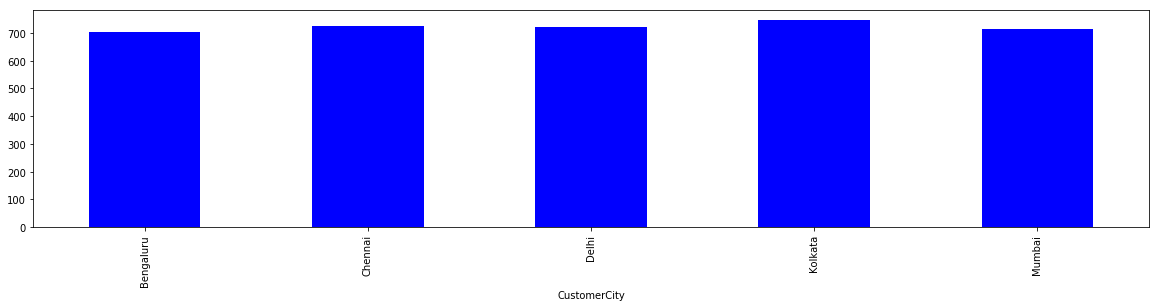

In [ ]:
data.groupby("CustomerCity")["CreditScore"].mean().plot(kind="bar", figsize=(20,4), color = "blue")

From the two plots above, it can be seen that no matter the gender or City, the average Customer Credit score is credit-worthy

### Relationship Between AnnualIncome, SpendingScore and CreditScore


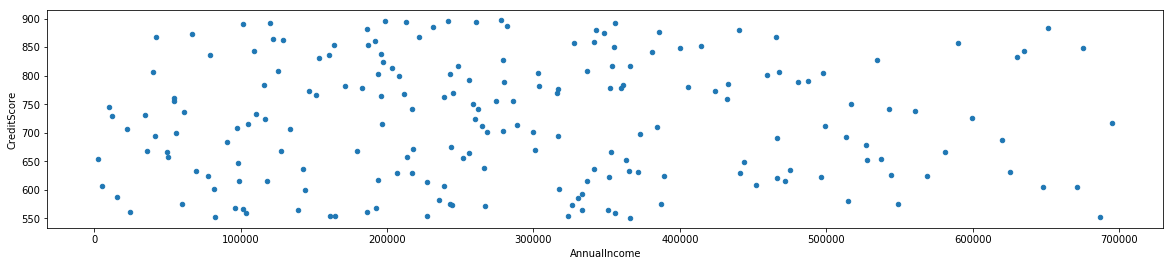

In [ ]:
data.plot(y="CreditScore", x="AnnualIncome", kind="scatter", figsize=(20,4))

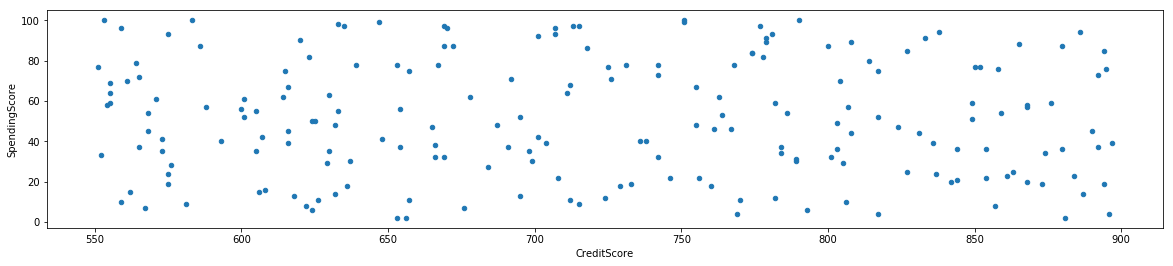

In [ ]:
data.plot(x="CreditScore", y="SpendingScore", kind="scatter", figsize=(20,4))

The two scatter plots above show that CreditScore has no clear relationship with AnnualIncome and SpendingScore

## CONCLUSION

1. The females should be targeted the most in all cities to improve sales since they earn more and spend more than the average nmale.
2. The cities, Bengaluru and Chennai have the highest number of recorded customers but the lowest average SpendingScore, hence, marketing strategies should be put in place to improve sales in these regions.
3. Advertisements should be tailored to suit older women of the ages 45 to 66 as they shop more and spend more.

**Thank you for reading.**